In [1]:
import pandas as pd
occupancy = pd.read_csv('./data/occupancy.csv')
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [2]:
occupancy.date = pd.to_datetime(occupancy.date)
occupancy.index = pd.DatetimeIndex(occupancy.date, freq='H')
occupancy.index

DatetimeIndex(['2015-02-02 14:00:00', '2015-02-02 15:00:00',
               '2015-02-02 16:00:00', '2015-02-02 17:00:00',
               '2015-02-02 18:00:00', '2015-02-02 19:00:00',
               '2015-02-02 20:00:00', '2015-02-02 21:00:00',
               '2015-02-02 22:00:00', '2015-02-02 23:00:00',
               ...
               '2015-05-24 04:00:00', '2015-05-24 05:00:00',
               '2015-05-24 06:00:00', '2015-05-24 07:00:00',
               '2015-05-24 08:00:00', '2015-05-24 09:00:00',
               '2015-05-24 10:00:00', '2015-05-24 11:00:00',
               '2015-05-24 12:00:00', '2015-05-24 13:00:00'],
              dtype='datetime64[ns]', name='date', length=2664, freq='H')

In [3]:
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-02 14:00:00,2015-02-02 14:00:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1


Figure(432x288)


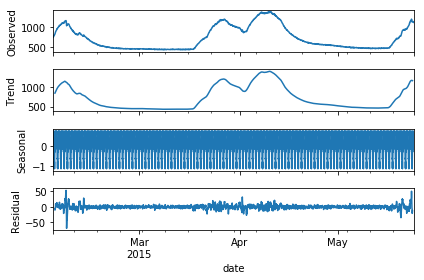

In [15]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(occupancy.CO2)
print(res.plot())

In [ ]:
%matplotlib inline
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(occupancy.CO2[0:(24*7)])
#print(res.seasonal)
print(res.plot())

In [ ]:
T = 3600
F = 1/3600
print(f'T={T}seg f={F}Hz')

In [5]:
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt

mod_FFT = np.abs(fft(res.seasonal))
print(len(mod_FFT)//2)
mod_FFT = mod_FFT[0:len(mod_FFT)//2]

x = np.arange(0,F,F/len(mod_FFT))

plt.stem(x[:50],mod_FFT[:50])
print(x[7],1/x[7]/3600,mod_FFT[2])

NameError: name 'res' is not defined

In [33]:
import math
Fm = 100
total_seconds = 1
x = np.arange(0,total_seconds,total_seconds/Fm)

f_osc = 1 
y = np.sin((2*math.pi*f_osc)*x) + 0.1 * np.sin((2*math.pi*10)*x)
# f(x) = y(x) + n(x)

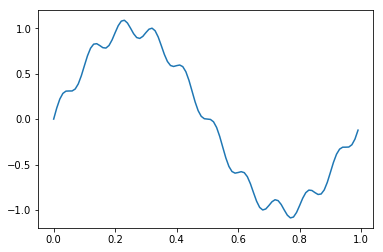

In [34]:
plt.plot(x,y)

<StemContainer object of 3 artists>

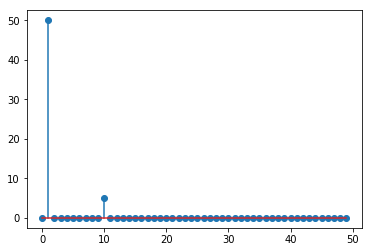

In [35]:
fft_mod = np.abs(fft(y))
fft_mod = fft_mod[0:len(fft_mod)//2]

fx = np.arange(0,Fm/2,Fm/2/len(fft_mod))
plt.stem(fx,fft_mod)

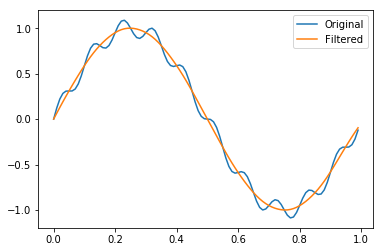

In [36]:
import numpy as np
from scipy import signal


# Define filter cutoff frequency and degree
b, a = signal.butter(3, 1/10)

# Apply modeled filter to data
y_filtered = signal.filtfilt(b, a, y)

plt.plot(x,y)
plt.plot(x,y_filtered)
plt.legend(["Original","Filtered"])


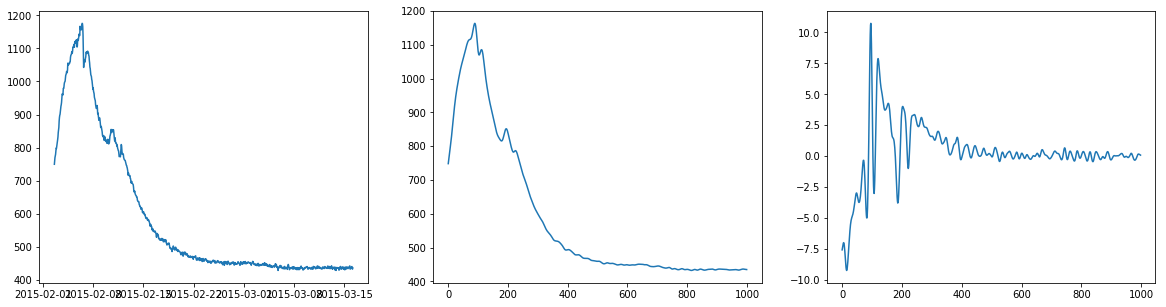

In [28]:
import numpy as np
from scipy import signal

# Load time series data from somewhere
data = occupancy.CO2[0:1000]

# Define filter cutoff frequency and degree
b, a = signal.butter(3, 1/10)

# Apply modeled filter to data
data_filtered = signal.filtfilt(b, a, data)

# Show the difference between filtered and unfiltered data
data_t1 = pd.Series(data_filtered).shift(periods=-1)
difference = data_filtered - data_t1

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(data)
plt.subplot(1,3,2)
plt.plot(data_filtered)
plt.subplot(1,3,3)
plt.plot(difference)

# Predicting temporal series

In [40]:
train, test = occupancy.CO2[:-10], occupancy.CO2[-10:]
print(len(train),len(test))


2654 10


In [42]:
from statsmodels.tsa.ar_model import AR
model = AR(train)
model_fit = model.fit(maxlag=1)
predictions = model_fit.predict(start=len(train),
                                end=len(train)+len(test)-1, dynamic=False)




In [51]:
eval_models = pd.DataFrame({
    "pred":predictions,
    "GT":test,
    "diff": predictions-test
})

eval_models 

,pred,GT,diff
2015-05-24 04:00:00,1152.762619,1153.250000,-0.487381
2015-05-24 05:00:00,1153.025305,1152.400000,0.625305
2015-05-24 06:00:00,1153.288058,1146.166667,7.121391
2015-05-24 07:00:00,1153.550877,1145.400000,8.150877
2015-05-24 08:00:00,1153.813763,1140.800000,13.013763
2015-05-24 09:00:00,1154.076715,1150.250000,3.826715
2015-05-24 10:00:00,1154.339734,1129.200000,25.139734
2015-05-24 11:00:00,1154.602820,1125.800000,28.802820
2015-05-24 12:00:00,1154.865972,1123.000000,31.865972
2015-05-24 13:00:00,1155.129191,1124.000000,31.129191


In [74]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(train, order=(5, 3))
model_fit = model.fit(disp=False)

predictions_ARMA = model_fit.predict(len(train), len(train)+len(test)-1)

In [75]:
eval_models["ARMA"] = predictions_ARMA
eval_models["diff_arma"] = predictions_ARMA - eval_models["GT"]

In [76]:
eval_models

,pred,GT,diff,ARMA,diff_arma
2015-05-24 04:00:00,1152.762619,1153.250000,-0.487381,1153.034598,-0.215402
2015-05-24 05:00:00,1153.025305,1152.400000,0.625305,1153.649583,1.249583
2015-05-24 06:00:00,1153.288058,1146.166667,7.121391,1154.299395,8.132728
2015-05-24 07:00:00,1153.550877,1145.400000,8.150877,1154.922557,9.522557
2015-05-24 08:00:00,1153.813763,1140.800000,13.013763,1155.480982,14.680982
2015-05-24 09:00:00,1154.076715,1150.250000,3.826715,1156.003669,5.753669
2015-05-24 10:00:00,1154.339734,1129.200000,25.139734,1156.502342,27.302342
2015-05-24 11:00:00,1154.602820,1125.800000,28.802820,1156.966105,31.166105
2015-05-24 12:00:00,1154.865972,1123.000000,31.865972,1157.391907,34.391907
2015-05-24 13:00:00,1155.129191,1124.000000,31.129191,1157.784261,33.784261


In [78]:
MSE_AR = (eval_models["diff"]**2).sum()/len(eval_models["diff"])
MSE_ARMA = (eval_models["diff_arma"]**2).sum()/len(eval_models["diff_arma"])

print(MSE_AR,MSE_ARMA)

374.7856691083888 444.798771946939
